In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm 
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [23]:
data_df = pd.read_csv("C:/Users/seyma/OneDrive/Masaüstü/heart.csv")
data_df.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


[Text(0, 0, '203'), Text(0, 0, '96')]

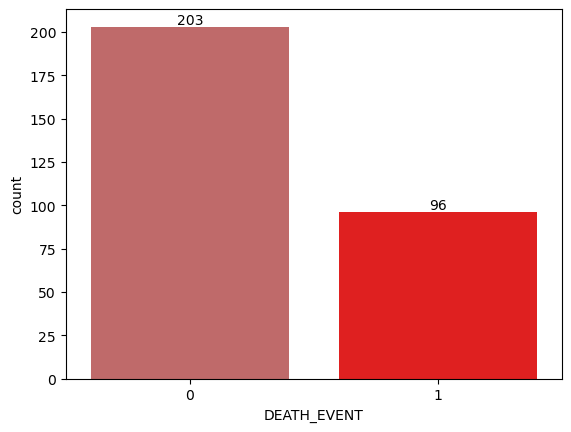

In [6]:
cols= ["#CD5C5C","#FF0000"]
ax = sns.countplot(x= data_df["DEATH_EVENT"], palette= cols)
ax.bar_label(ax.containers[0])

In [7]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


<AxesSubplot:>

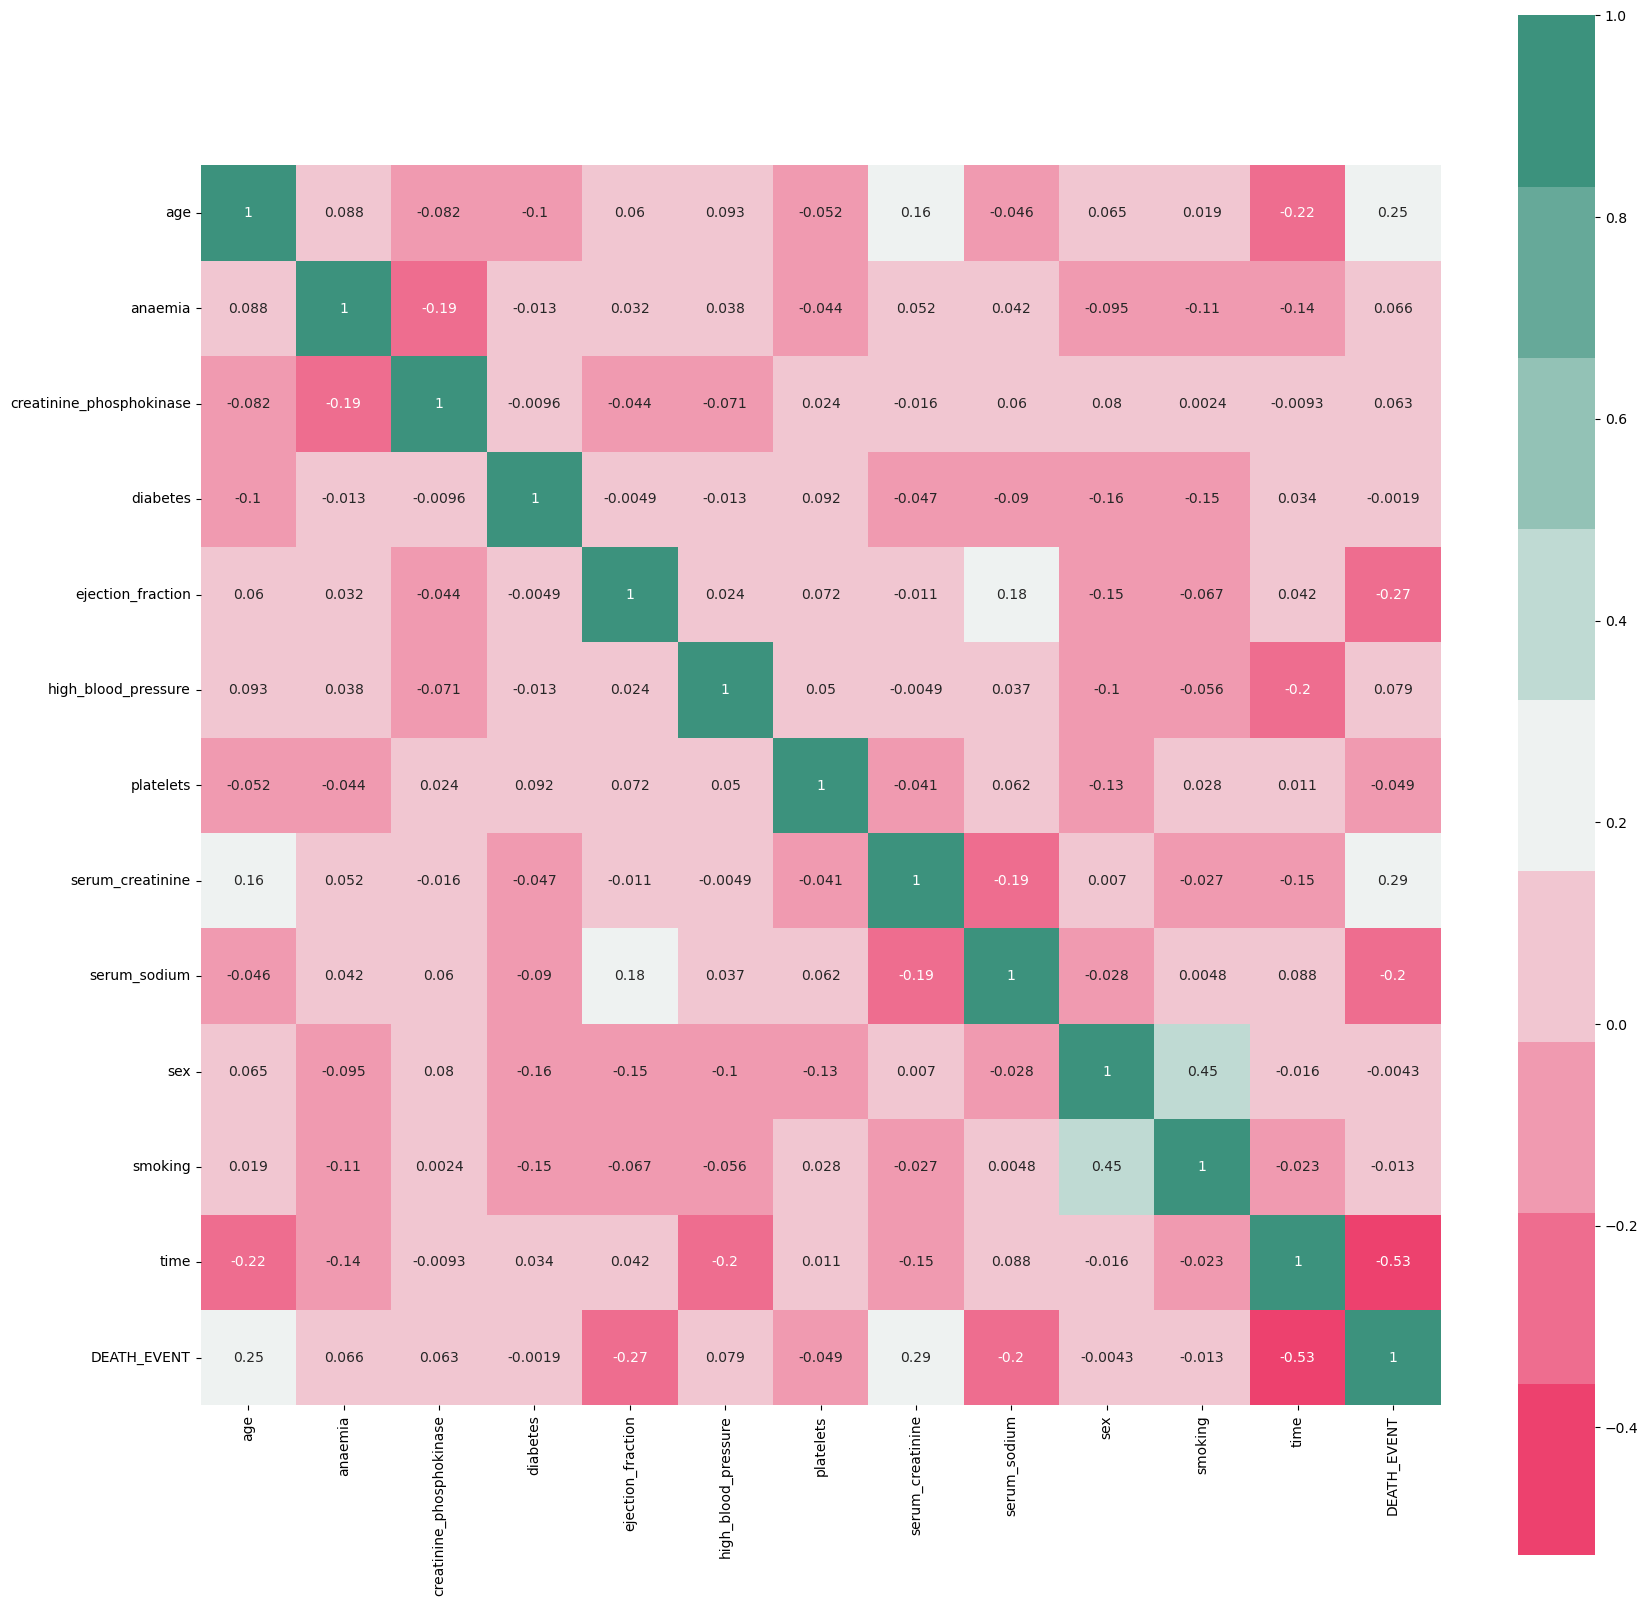

In [8]:
cmap = sns.diverging_palette(2, 165, s=80, l=55, n=9)
corrmat = data_df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

Text(0.5, 1.0, 'Distribution Of Age')

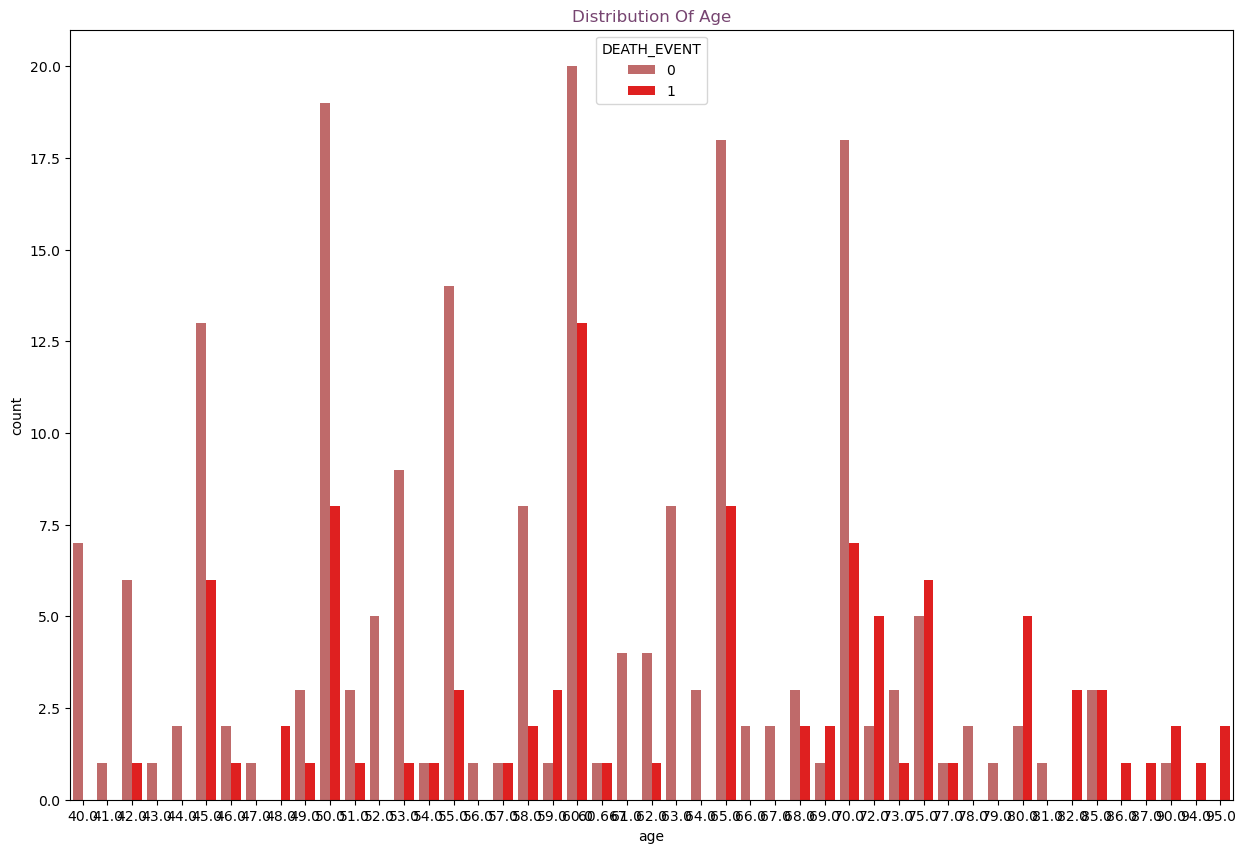

In [9]:
#Evauating age distribution as per the deaths happened
plt.figure(figsize=(15,10))
Days_of_week=sns.countplot(x=data_df['age'],data=data_df, hue ="DEATH_EVENT",palette = cols)
Days_of_week.set_title("Distribution Of Age", color="#774571")

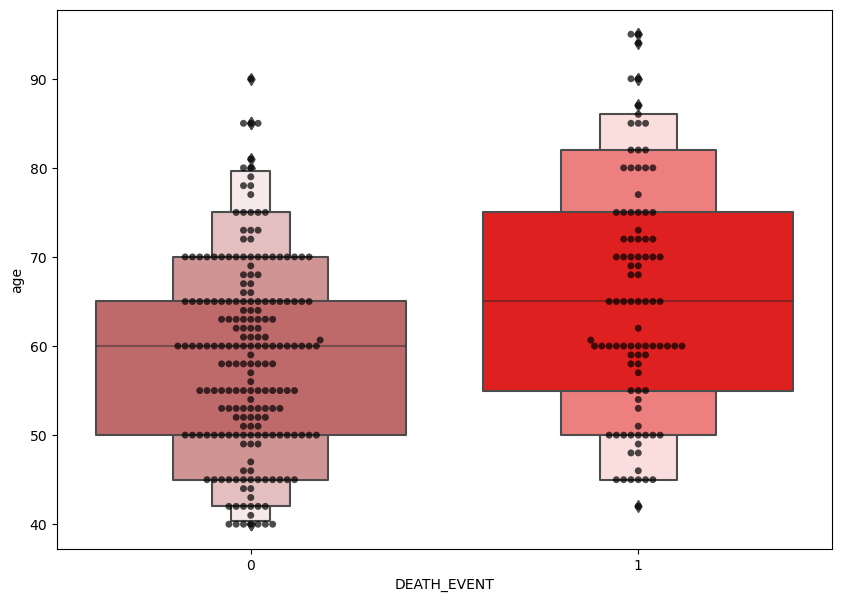

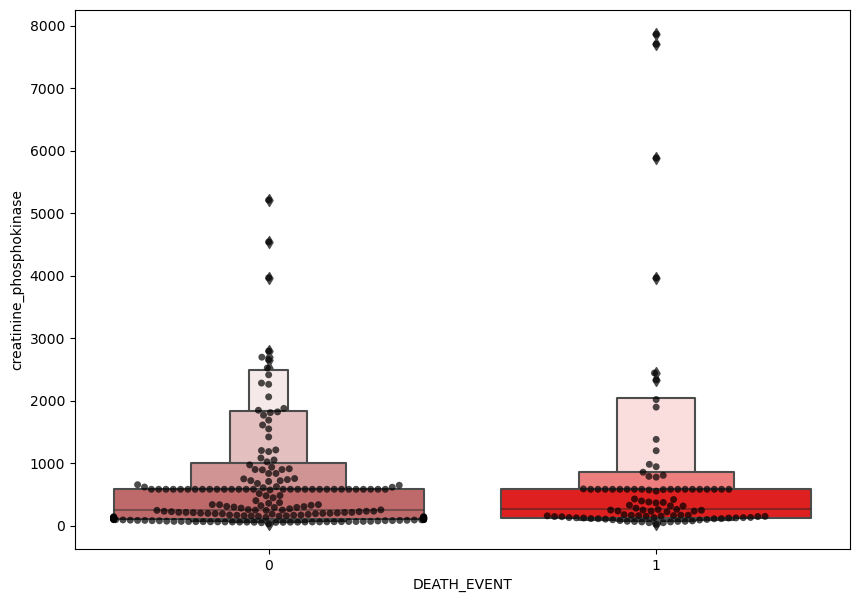

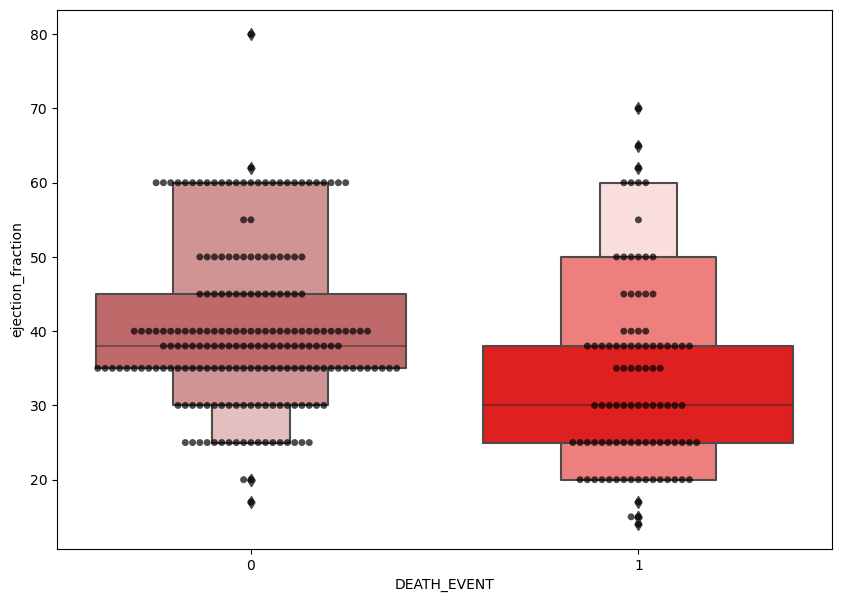

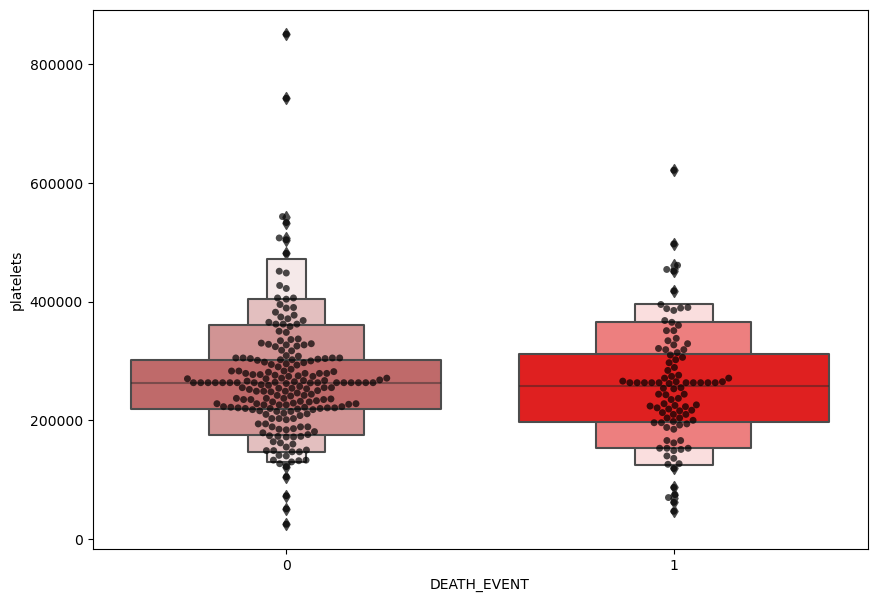

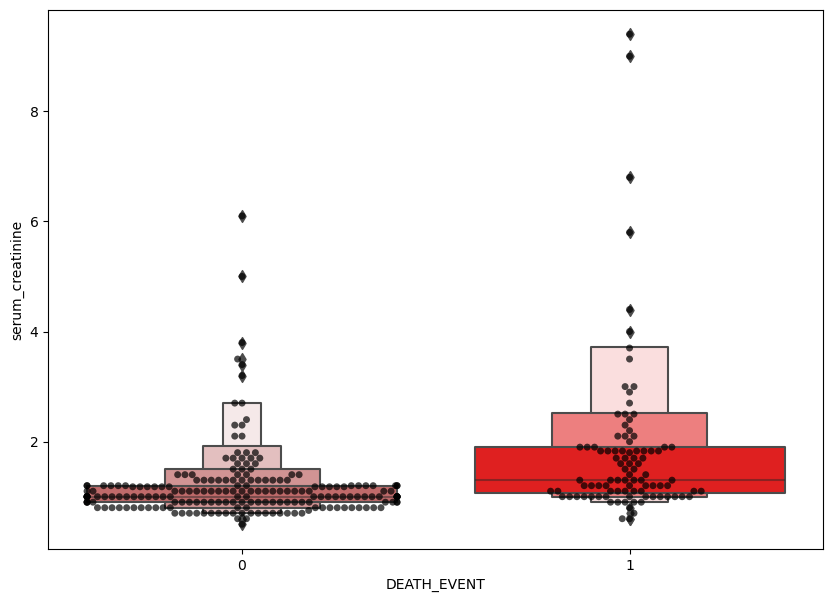

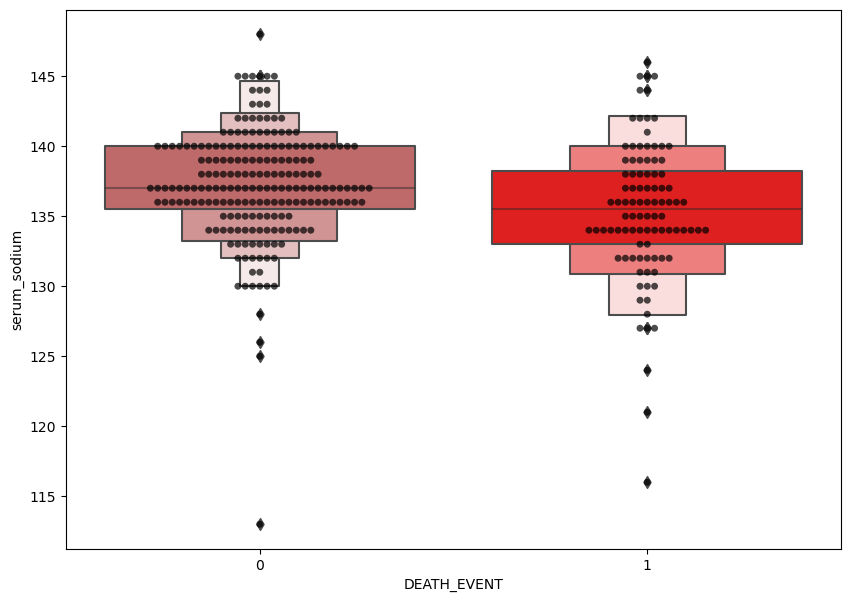

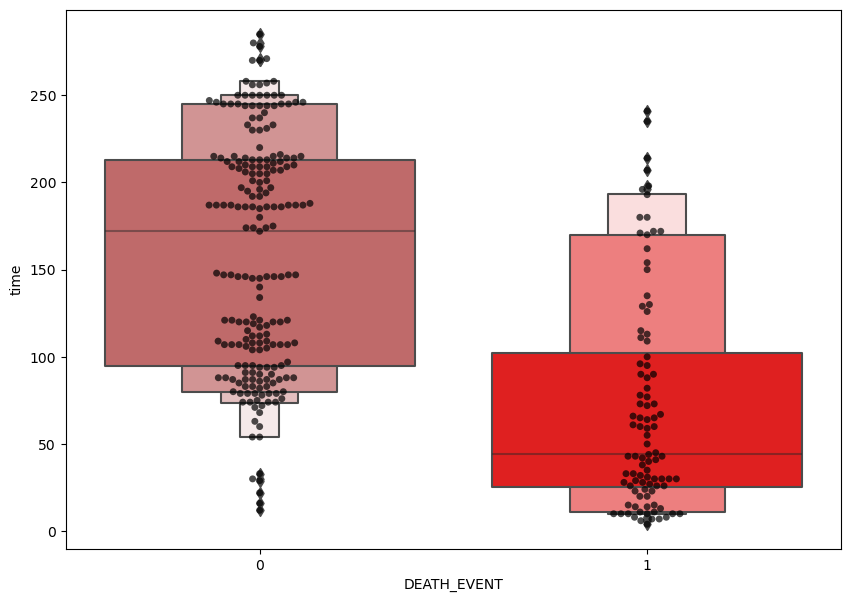

In [10]:
feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature: 
    plt.figure(figsize=(10,7))
    sns.swarmplot(x=data_df["DEATH_EVENT"], y=data_df[i], color="black", alpha=0.7)
    sns.boxenplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)
    plt.show() 

<AxesSubplot:xlabel='time', ylabel='age'>

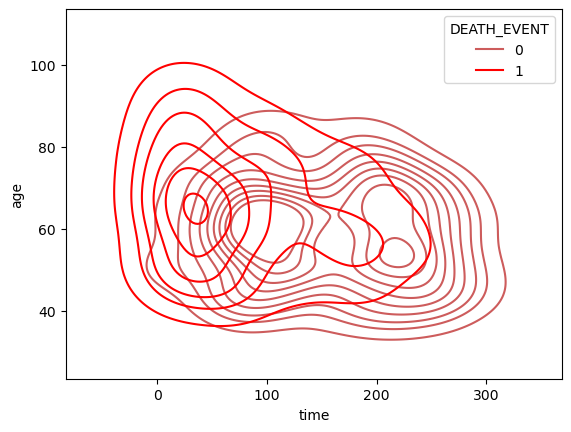

In [11]:
sns.kdeplot(x=data_df["time"], y=data_df["age"], hue =data_df["DEATH_EVENT"], palette=cols)

In [12]:
X=data_df.drop(["DEATH_EVENT"],axis=1)
y=data_df["DEATH_EVENT"]

In [13]:
# Setting up a standard scaler for the features and analyzing it thereafter
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_scaled= s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)   
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.265205e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,3.594301e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,3.713120e-18,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,1.113936e-16,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,3.341808e-18,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,-4.841909e-16,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,1.009969e-16,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,-2.227872e-18,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.627435e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-5.940993e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


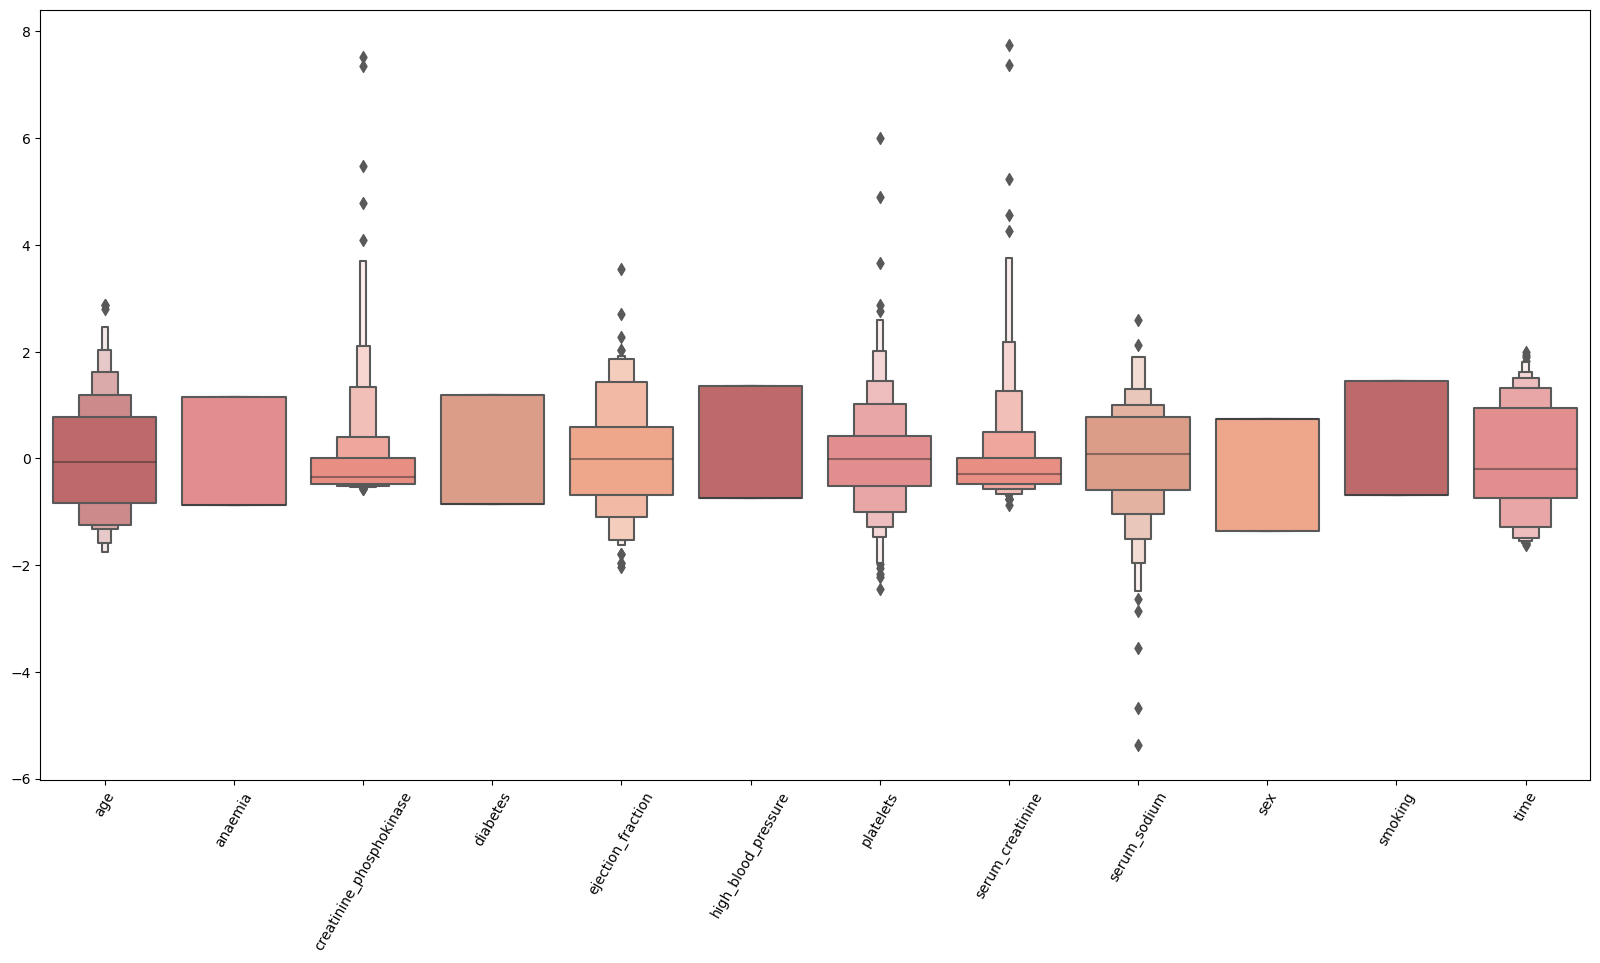

In [14]:
colors =["#CD5C5C","#F08080","#FA8072","#E9967A","#FFA07A"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_scaled,palette = colors)
plt.xticks(rotation=60)
plt.show()

In [15]:
X_train, X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=25)

In [16]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 25, epochs = 80,callbacks=[early_stopping], validation_split=0.25)

Epoch 1/80
7/7 [==============================] - 3s 86ms/step - loss: 0.6928 - accuracy: 0.6282 - val_loss: 0.6915 - val_accuracy: 0.8302
Epoch 2/80
7/7 [==============================] - 0s 13ms/step - loss: 0.6922 - accuracy: 0.6346 - val_loss: 0.6895 - val_accuracy: 0.8302
Epoch 3/80
7/7 [==============================] - 0s 15ms/step - loss: 0.6914 - accuracy: 0.6346 - val_loss: 0.6877 - val_accuracy: 0.8302
Epoch 4/80
7/7 [==============================] - 0s 14ms/step - loss: 0.6906 - accuracy: 0.6346 - val_loss: 0.6856 - val_accuracy: 0.8302
Epoch 5/80
7/7 [==============================] - 0s 16ms/step - loss: 0.6897 - accuracy: 0.6346 - val_loss: 0.6834 - val_accuracy: 0.8302
Epoch 6/80
7/7 [==============================] - 0s 13ms/step - loss: 0.6889 - accuracy: 0.6346 - val_loss: 0.6811 - val_accuracy: 0.8302
Epoch 7/80
7/7 [==============================] - 0s 15ms/step - loss: 0.6881 - accuracy: 0.6346 - val_loss: 0.6788 - val_accuracy: 0.8302
Epoch 8/80
7/7 [===========

7/7 [==============================] - 0s 9ms/step - loss: 0.3770 - accuracy: 0.8141 - val_loss: 0.2925 - val_accuracy: 0.8868
Epoch 60/80
7/7 [==============================] - 0s 8ms/step - loss: 0.3977 - accuracy: 0.8141 - val_loss: 0.2913 - val_accuracy: 0.8868
Epoch 61/80
7/7 [==============================] - 0s 9ms/step - loss: 0.4039 - accuracy: 0.7885 - val_loss: 0.2927 - val_accuracy: 0.8868
Epoch 62/80
7/7 [==============================] - 0s 9ms/step - loss: 0.3837 - accuracy: 0.8141 - val_loss: 0.2912 - val_accuracy: 0.8868
Epoch 63/80
7/7 [==============================] - 0s 10ms/step - loss: 0.4253 - accuracy: 0.7692 - val_loss: 0.2915 - val_accuracy: 0.8679
Epoch 64/80
7/7 [==============================] - 0s 10ms/step - loss: 0.3601 - accuracy: 0.8333 - val_loss: 0.2943 - val_accuracy: 0.8679
Epoch 65/80
7/7 [==============================] - 0s 10ms/step - loss: 0.3910 - accuracy: 0.7436 - val_loss: 0.3009 - val_accuracy: 0.8491
Epoch 66/80
7/7 [===================

In [17]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))


val_accuracy is: 85.90%


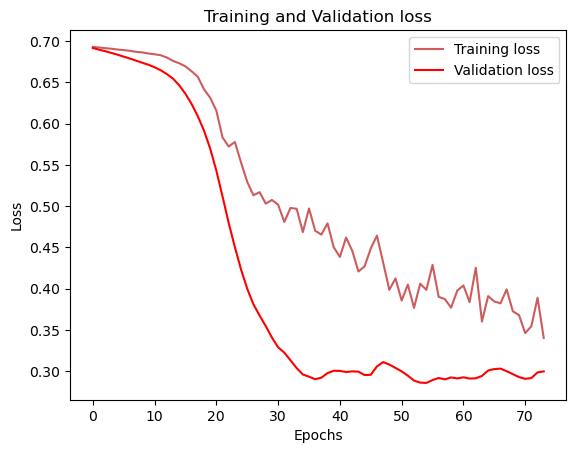

In [18]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()


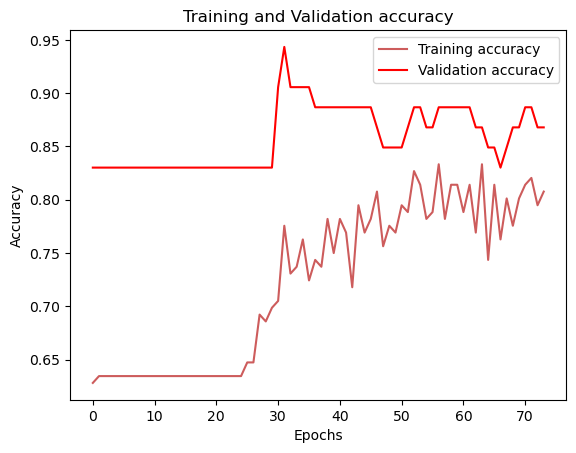

In [19]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)
np.set_printoptions()

3/3 [==============================] - 0s 7ms/step


<AxesSubplot:>

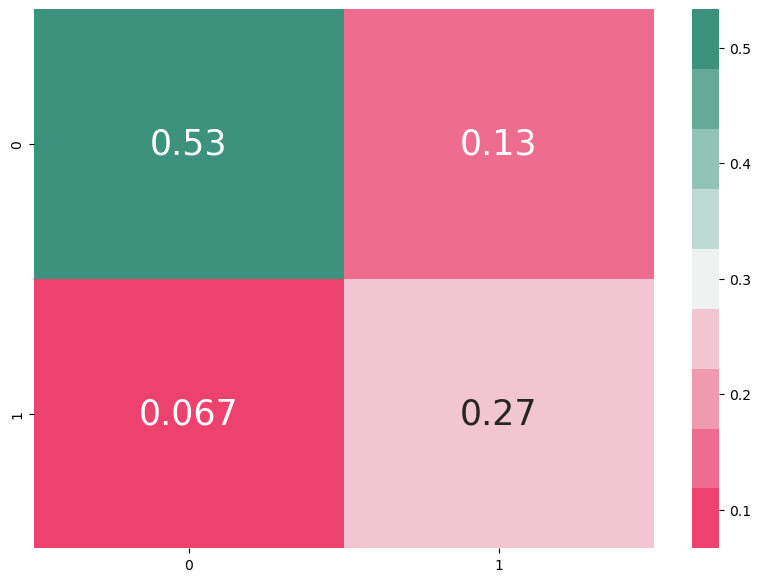

In [21]:
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        60
           1       0.67      0.80      0.73        30

    accuracy                           0.80        90
   macro avg       0.78      0.80      0.78        90
weighted avg       0.81      0.80      0.80        90

